In [2]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix

In [3]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
  

# Load data

In [4]:
label = pd.read_excel('data_label.xlsx')
label

,frame_no,T,nursing_num,nursing_class,nursing_label
0,0,2021-03-06 03:29:28,9,Median Nursing,2
1,3,2021-03-06 03:29:48,8,Median Nursing,2
2,4,2021-03-06 03:29:53,9,Median Nursing,2
3,6,2021-03-06 03:30:04,10,High Nursing,3
4,7,2021-03-06 03:30:09,10,High Nursing,3
...,...,...,...,...,...
784,1468,2021-03-06 05:58:52,9,Median Nursing,2
785,1469,2021-03-06 05:58:57,11,High Nursing,3
786,1470,2021-03-06 05:59:01,12,High Nursing,3
787,1475,2021-03-06 05:59:34,13,High Nursing,3


In [5]:
t_features = pd.read_excel('t_features.xlsx')
t_features

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,S32_t_min,S32_t_var,S34_t_mean,S34_t_max,S34_t_min,S34_t_var
0,0.000517,1.270225,-1.036775,0.086980,-0.000738,2.586311,-2.287805,0.335343,-0.004856,3.400630,-2.658620,0.488374,-0.002539,1.027453,-1.499620,0.081592
1,0.001943,1.595571,-1.968448,0.128883,0.001512,3.679694,-3.908119,0.605732,-0.015456,6.023790,-6.371273,0.862563,0.000859,1.672663,-1.463775,0.129544
2,0.004770,1.211071,-1.110717,0.082538,-0.002619,4.101239,-3.736866,0.407109,0.005519,5.127055,-5.080644,0.585190,-0.000273,1.296291,-1.159092,0.076826
3,0.000310,1.018821,-0.755794,0.048695,0.001528,3.179109,-3.249454,0.644513,-0.000193,1.414403,-1.057905,0.096520,0.000451,0.848228,-0.764797,0.045854
4,0.001144,0.649110,-0.637487,0.029036,0.000116,2.362365,-2.142898,0.318800,-0.006908,1.154601,-0.982479,0.101503,0.000279,0.669003,-0.657262,0.028997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.002463,3.473706,-3.402929,0.525458,0.001892,1.993513,-2.116552,0.332107,-0.014270,10.892980,-11.282366,2.071843,-0.001399,2.891394,-3.273948,0.527710
785,-0.005759,3.370187,-3.284621,0.519875,0.004763,7.513120,-6.529602,0.736338,0.014758,3.375488,-4.561040,0.581097,-0.010532,4.396884,-3.901235,0.579984
786,0.000103,3.532860,-4.275448,0.716061,0.008584,12.518968,-10.968999,3.886378,-0.000750,3.819665,-4.158766,0.658163,-0.006575,4.396884,-4.313453,0.739899
787,0.007178,12.539033,-18.812507,2.813114,-0.001344,3.969506,-3.670999,0.413931,-0.009281,7.146805,-7.578094,1.359784,-0.006166,18.681120,-16.231918,3.445749


In [6]:
energy_features = pd.read_excel('energy_features.xlsx')
energy_features

,S30_energy_mean,S30_energy_max,S30_energy_min,S30_energy_var,S31_energy_mean,S31_energy_max,S31_energy_min,S31_energy_var,S32_energy_mean,S32_energy_max,S32_energy_min,S32_energy_var,S34_energy_mean,S34_energy_max,S34_energy_min,S34_energy_var
0,0.086945,1.613472,0.000003,0.020373,0.335209,6.689005,0.000019,0.361875,0.488202,11.564282,0.000004,0.991575,0.081566,2.248860,0.000034,0.019129
1,0.128835,3.874788,0.000003,0.081592,0.605492,15.273391,0.000019,1.536275,0.862457,40.593114,0.000004,12.385405,0.129493,2.797803,0.000034,0.054399
2,0.082528,1.466693,0.000003,0.020246,0.406953,16.820160,0.000019,1.234135,0.584987,26.286692,0.000004,5.471215,0.076796,1.680370,0.000034,0.017361
3,0.048676,1.037997,0.000003,0.006241,0.644258,10.558953,0.000019,1.432094,0.096482,2.000535,0.000004,0.020546,0.045836,0.719491,0.000034,0.004764
4,0.029025,0.421343,0.000003,0.001997,0.318673,5.580769,0.000019,0.283628,0.101510,1.333103,0.000004,0.022315,0.028986,0.447565,0.000034,0.001997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.525254,12.066633,0.000003,1.204574,0.331978,4.479792,0.000019,0.263527,2.071218,127.291778,0.000004,106.661309,0.527500,10.718734,0.000034,0.860375
785,0.519700,11.358158,0.000003,1.124754,0.736067,56.446968,0.000019,9.446752,0.581083,20.803088,0.000004,2.446431,0.579863,19.332588,0.000034,1.573684
786,0.715775,18.279458,0.000003,2.427880,3.884898,156.724563,0.000019,122.951720,0.657901,17.295338,0.000004,2.265281,0.739646,19.332588,0.000034,2.345285
787,2.812040,353.910404,0.000003,153.192438,0.413767,15.756978,0.000019,0.808850,1.359327,57.427510,0.000004,27.184875,3.444409,348.984226,0.000034,286.498795


In [7]:
var_features = pd.read_excel('var_features.xlsx')
var_features

,S30_S30_var_max1,S30_S30_var_max2,S30_S30_var_min1,S30_S30_var_min2,S30_S31_var_max1,S30_S31_var_max2,S30_S31_var_min1,S30_S31_var_min2,S30_S32_var_max1,S30_S32_var_max2,...,S34_S31_var_min1,S34_S31_var_min2,S34_S32_var_max1,S34_S32_var_max2,S34_S32_var_min1,S34_S32_var_min2,S34_S34_var_max1,S34_S34_var_max2,S34_S34_var_min1,S34_S34_var_min2
0,0.138748,0.096515,0.044172,0.066382,0.343732,0.234808,0.164845,0.287298,0.414631,0.379428,...,0.169468,0.306184,0.475419,0.822408,0.493964,0.236596,0.135097,0.099512,0.031629,0.049821
1,0.280816,0.239450,0.031009,0.061398,0.608006,0.338017,0.678525,0.939937,0.450924,0.678963,...,0.182794,0.497634,1.926890,1.677501,0.091921,1.740579,0.240470,0.219303,0.031022,0.119256
2,0.145354,0.087289,0.040250,0.038559,0.402899,0.705075,0.218979,0.397175,0.718400,0.206052,...,0.380214,0.366296,0.921050,1.217939,0.088257,0.300945,0.156813,0.089152,0.042760,0.052034
3,0.070134,0.062304,0.030642,0.041206,0.977569,0.544849,0.931264,0.361940,0.120596,0.105400,...,0.374940,0.535826,0.102977,0.117500,0.096003,0.064478,0.066027,0.051483,0.031844,0.032671
4,0.043909,0.031013,0.020783,0.024421,0.303445,0.246365,0.454219,0.243773,0.122625,0.090413,...,0.276758,0.343697,0.124665,0.070616,0.106910,0.129876,0.041181,0.035887,0.016306,0.021105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.756011,0.705482,0.287459,0.326069,0.254378,0.305415,0.361983,0.408183,0.473934,7.504321,...,0.377721,0.427034,0.543263,7.511082,1.019561,0.702703,0.674647,0.635769,0.385492,0.408618
785,0.985584,0.611475,0.162241,0.359078,2.590886,0.363867,0.268914,0.198415,0.238695,0.946653,...,0.173968,0.191198,0.285839,0.957926,0.095642,0.396272,1.097204,0.599208,0.200576,0.337991
786,1.382925,0.981029,0.203682,0.383391,5.319544,2.676059,0.720977,0.336344,0.709338,0.308940,...,0.527455,0.336344,1.048718,0.296700,0.771913,0.885069,1.430955,1.038415,0.264483,0.474007
787,10.949572,1.142967,0.508919,0.652544,0.721426,0.520444,0.313315,0.246999,2.911410,0.429990,...,0.313315,0.247040,2.921556,0.429895,2.835734,0.512062,13.408126,1.663209,0.560171,0.923077


In [8]:
freq_table = pd.read_excel('freq_table.xlsx')
freq_table

,S30_mean_10,S30_mean_30,S30_mean_50,S30_mean_70,S30_mean_90,S30_mean_110,S30_mean_130,S30_mean_150,S30_mean_170,S30_mean_190,...,S34_kurtosis_50,S34_kurtosis_70,S34_kurtosis_90,S34_kurtosis_110,S34_kurtosis_130,S34_kurtosis_150,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230
0,0.018507,0.017504,0.016125,0.007714,0.005139,0.005607,0.006206,0.005725,0.003315,0.004297,...,4.035490,5.061643,3.481701,3.662479,5.500156,6.803657,4.139061,4.490122,3.293564,2.585273
1,0.029561,0.017285,0.014049,0.006813,0.004960,0.005056,0.004505,0.003963,0.002665,0.004003,...,3.704139,3.058190,5.690243,3.921789,4.180020,5.079130,2.745473,2.760436,3.240399,2.477027
2,0.023424,0.016298,0.012772,0.006828,0.004705,0.003795,0.003652,0.002892,0.002247,0.004191,...,3.123416,3.264597,3.923943,2.979703,7.512671,6.152695,3.795412,2.886466,3.808655,4.170752
3,0.010583,0.014287,0.013421,0.006618,0.005019,0.003891,0.003858,0.002738,0.002593,0.002762,...,7.792933,3.329789,15.807445,5.345968,4.346313,3.275401,5.287601,2.195618,2.572932,3.532361
4,0.009364,0.011234,0.009119,0.004805,0.003106,0.002279,0.002734,0.001933,0.001657,0.001823,...,5.663439,8.662427,10.863758,3.354272,6.634418,4.912535,3.641311,2.658092,2.854112,3.720335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.031478,0.046230,0.041106,0.030123,0.017280,0.017146,0.014249,0.013430,0.011428,0.015340,...,3.380128,4.614241,3.146149,3.221171,3.679952,3.873454,2.842576,3.207479,3.802687,3.869489
785,0.022550,0.037773,0.038515,0.029431,0.018856,0.017654,0.016551,0.013095,0.014307,0.020048,...,4.252133,3.620349,2.385689,3.416495,3.099049,7.559461,5.318507,3.125103,3.403849,3.156039
786,0.020847,0.040611,0.044299,0.040697,0.021795,0.022545,0.019932,0.015922,0.019021,0.028266,...,4.022055,2.749714,5.100911,8.589229,2.758482,5.882003,3.687822,3.234043,3.192962,4.054155
787,0.031306,0.036654,0.073571,0.105540,0.053671,0.054006,0.043020,0.037766,0.034833,0.066242,...,4.032327,2.373798,2.996113,5.841529,2.815361,3.526095,2.200064,3.317183,2.552042,3.843305


In [9]:
peaks_feature = pd.read_excel('peaks_table.xlsx')
peaks_feature

,p1_freq,p2_freq,p3_freq,p1,p2,p3
0,34.6,29.4,40.0,0.195896,0.160975,0.094772
1,32.4,37.6,25.6,0.303695,0.163169,0.075573
2,29.6,37.6,14.6,0.227851,0.142173,0.039019
3,33.4,27.2,41.2,0.330037,0.118091,0.109933
4,27.4,37.2,42.4,0.175879,0.160469,0.089803
...,...,...,...,...,...,...
784,34.2,28.8,43.2,0.207092,0.143361,0.067956
785,29.6,36.8,42.4,0.223447,0.221717,0.070512
786,31.0,38.8,64.2,0.615589,0.227082,0.134888
787,35.6,30.0,41.4,0.208259,0.144831,0.061645


In [10]:
X_all = pd.concat([t_features,energy_features, var_features,freq_table,peaks_feature],axis=1)
X_all

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,...,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230,p1_freq,p2_freq,p3_freq,p1,p2,p3
0,0.000517,1.270225,-1.036775,0.086980,-0.000738,2.586311,-2.287805,0.335343,-0.004856,3.400630,...,4.139061,4.490122,3.293564,2.585273,34.6,29.4,40.0,0.195896,0.160975,0.094772
1,0.001943,1.595571,-1.968448,0.128883,0.001512,3.679694,-3.908119,0.605732,-0.015456,6.023790,...,2.745473,2.760436,3.240399,2.477027,32.4,37.6,25.6,0.303695,0.163169,0.075573
2,0.004770,1.211071,-1.110717,0.082538,-0.002619,4.101239,-3.736866,0.407109,0.005519,5.127055,...,3.795412,2.886466,3.808655,4.170752,29.6,37.6,14.6,0.227851,0.142173,0.039019
3,0.000310,1.018821,-0.755794,0.048695,0.001528,3.179109,-3.249454,0.644513,-0.000193,1.414403,...,5.287601,2.195618,2.572932,3.532361,33.4,27.2,41.2,0.330037,0.118091,0.109933
4,0.001144,0.649110,-0.637487,0.029036,0.000116,2.362365,-2.142898,0.318800,-0.006908,1.154601,...,3.641311,2.658092,2.854112,3.720335,27.4,37.2,42.4,0.175879,0.160469,0.089803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.002463,3.473706,-3.402929,0.525458,0.001892,1.993513,-2.116552,0.332107,-0.014270,10.892980,...,2.842576,3.207479,3.802687,3.869489,34.2,28.8,43.2,0.207092,0.143361,0.067956
785,-0.005759,3.370187,-3.284621,0.519875,0.004763,7.513120,-6.529602,0.736338,0.014758,3.375488,...,5.318507,3.125103,3.403849,3.156039,29.6,36.8,42.4,0.223447,0.221717,0.070512
786,0.000103,3.532860,-4.275448,0.716061,0.008584,12.518968,-10.968999,3.886378,-0.000750,3.819665,...,3.687822,3.234043,3.192962,4.054155,31.0,38.8,64.2,0.615589,0.227082,0.134888
787,0.007178,12.539033,-18.812507,2.813114,-0.001344,3.969506,-3.670999,0.413931,-0.009281,7.146805,...,2.200064,3.317183,2.552042,3.843305,35.6,30.0,41.4,0.208259,0.144831,0.061645


In [11]:
for col in X_all.columns:
    print(col)

S30_t_mean
S30_t_max
S30_t_min
S30_t_var
S31_t_mean
S31_t_max
S31_t_min
S31_t_var
S32_t_mean
S32_t_max
S32_t_min
S32_t_var
S34_t_mean
S34_t_max
S34_t_min
S34_t_var
S30_energy_mean
S30_energy_max
S30_energy_min
S30_energy_var
S31_energy_mean
S31_energy_max
S31_energy_min
S31_energy_var
S32_energy_mean
S32_energy_max
S32_energy_min
S32_energy_var
S34_energy_mean
S34_energy_max
S34_energy_min
S34_energy_var
S30_S30_var_max1
S30_S30_var_max2
S30_S30_var_min1
S30_S30_var_min2
S30_S31_var_max1
S30_S31_var_max2
S30_S31_var_min1
S30_S31_var_min2
S30_S32_var_max1
S30_S32_var_max2
S30_S32_var_min1
S30_S32_var_min2
S30_S34_var_max1
S30_S34_var_max2
S30_S34_var_min1
S30_S34_var_min2
S31_S30_var_max1
S31_S30_var_max2
S31_S30_var_min1
S31_S30_var_min2
S31_S31_var_max1
S31_S31_var_max2
S31_S31_var_min1
S31_S31_var_min2
S31_S32_var_max1
S31_S32_var_max2
S31_S32_var_min1
S31_S32_var_min2
S31_S34_var_max1
S31_S34_var_max2
S31_S34_var_min1
S31_S34_var_min2
S32_S30_var_max1
S32_S30_var_max2
S32_S30_var_mi

# X y


In [12]:
X = X_all
y = label.iloc[:,-1]
print("X.shape",X_all.shape)
print("y.shape",y.shape)
y

X.shape (789, 390)
y.shape (789,)


0      2
1      2
2      2
3      3
4      3
      ..
784    2
785    3
786    3
787    3
788    3
Name: nursing_label, Length: 789, dtype: int64

In [13]:
# normalize input
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
X = (X - x_mean) / x_std
X

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,...,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230,p1_freq,p2_freq,p3_freq,p1,p2,p3
0,0.096612,-0.816970,0.878928,-0.382255,-0.212623,-0.379517,0.438606,-0.266365,-0.425637,-0.129905,...,0.504626,1.221884,-0.036931,-0.690507,0.727027,-0.638491,0.372632,-0.306594,-0.067873,-0.031133
1,0.411733,-0.755113,0.708347,-0.365497,0.474857,-0.139809,0.084499,-0.172833,-1.314143,0.595859,...,-0.725179,-0.539902,-0.089316,-0.824852,0.001672,0.741700,-0.960228,0.097716,-0.051870,-0.283635
2,1.036744,-0.828217,0.865390,-0.384032,-0.787401,-0.047391,0.121925,-0.241540,0.444042,0.347754,...,0.201365,-0.411533,0.470602,1.277244,-0.921508,0.741700,-1.978385,-0.186745,-0.205026,-0.764370
3,0.050847,-0.864769,0.930373,-0.397567,0.479687,-0.249555,0.228445,-0.159418,-0.034773,-0.679445,...,1.518183,-1.115202,-0.746989,0.484931,0.331379,-1.008787,0.483704,0.196513,-0.380690,0.168256
4,0.235213,-0.935061,0.952034,-0.405429,0.048201,-0.428614,0.470274,-0.272087,-0.597606,-0.751325,...,0.065374,-0.644145,-0.469935,0.718227,-1.646864,0.674373,0.594775,-0.381671,-0.071562,-0.096483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.526798,-0.398027,0.445706,-0.206894,0.590778,-0.509479,0.476032,-0.267484,-1.214671,1.943042,...,-0.639488,-0.084563,0.464721,0.903344,0.595144,-0.739481,0.668823,-0.264602,-0.196362,-0.383798
785,-1.290705,-0.417709,0.467367,-0.209127,1.468241,0.700614,-0.488405,-0.127654,1.218465,-0.136861,...,1.545456,-0.168467,0.071736,0.017875,-0.921508,0.607047,0.594775,-0.203264,0.375211,-0.350183
786,0.005083,-0.386781,0.285956,-0.130666,2.635507,1.798074,-1.458599,0.962001,-0.081418,-0.013968,...,0.106419,-0.057506,-0.136057,1.132534,-0.459918,0.943679,2.612577,1.267503,0.414347,0.496454
787,1.568920,1.325541,-2.375650,0.708010,-0.397776,-0.076272,0.136320,-0.239180,-0.796550,0.906569,...,-1.206489,0.027178,-0.767573,0.870847,1.056734,-0.537502,0.502216,-0.260225,-0.185634,-0.466803


In [14]:
# print(x_mean)
# print(x_std)

## Split train test

In [15]:
# train test split based on un-compressed features
idx = range(X.shape[0])
train_size =int(0.667*X.shape[0])
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, idx, train_size=train_size, stratify=y, random_state=42)

In [16]:
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape (526, 390)
X_test.shape (263, 390)
y_train.shape (526,)
y_test.shape (263,)


Text(0.5, 1.0, 'y_test')

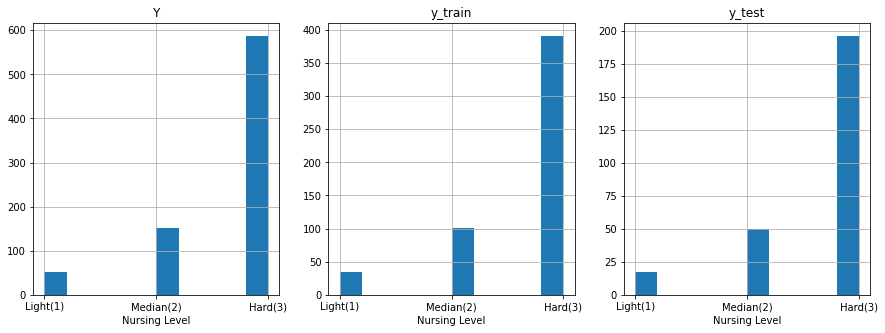

In [17]:
# plot y distribution
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1)
plt.hist(y)
plt.xlabel('Nursing Level')
plt.grid("minor")
plt.title("Y")
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])


ax = plt.subplot(1, 3, 2)
plt.hist(y_train)
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])
plt.xlabel('Nursing Level')

plt.grid("minor")
plt.title("y_train")
ax =plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])
plt.grid("minor")
plt.xlabel('Nursing Level')
plt.title("y_test")

Text(0, 0.5, 'percentage')

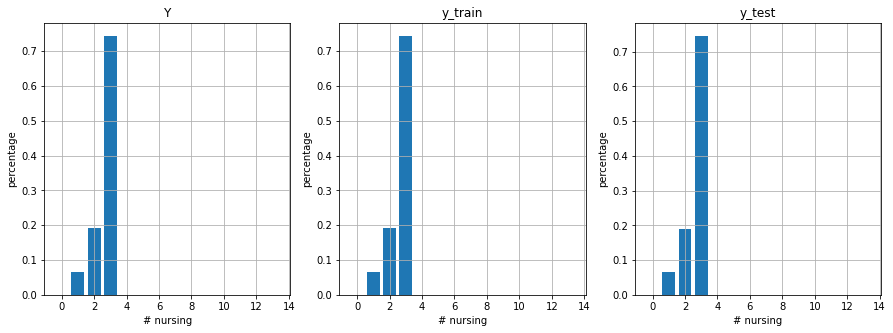

In [18]:
# number of nursing
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
nursing_perc = [sum(y==i)/len(y) for i in range(14)]
plt.bar(np.arange(14), nursing_perc)
plt.xlabel('# nursing')
plt.ylabel("percentage")
plt.grid('minor')
plt.title("Y")

plt.subplot(1, 3, 2)
nursing_perc = [sum(y_train==i)/len(y_train) for i in range(14)]
plt.bar(np.arange(14), nursing_perc)
plt.title("y_train")
plt.grid('minor')
plt.xlabel('# nursing')
plt.ylabel("percentage")

plt.subplot(1, 3, 3)
nursing_perc = [sum(y_test==i)/len(y_test) for i in range(14)]
plt.bar(np.arange(14), nursing_perc)
plt.title("y_test")
plt.grid('minor')
plt.xlabel('# nursing')
plt.ylabel("percentage")

# Naive random over-sampling

In [19]:
# handling unbalanced labels
from imblearn.over_sampling import SMOTE, RandomOverSampler
ros = RandomOverSampler('auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train)
X_ros.shape

/Users/xiaokun/Library/Python/3.8/lib/python/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


(1173, 390)

Text(0.5, 1.0, 'y_test')

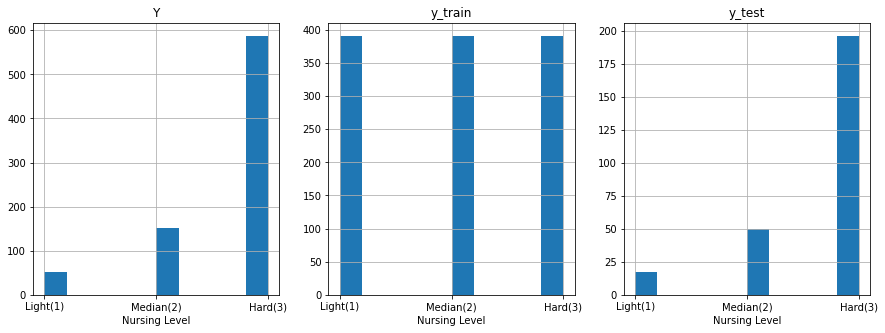

In [20]:
# plot y distribuiton after  Naive random over-sampling
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1)
plt.hist(y)
plt.xlabel('Nursing Level')
plt.grid("minor")
plt.title("Y")
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])


ax = plt.subplot(1, 3, 2)
plt.hist(y_ros)
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])
plt.xlabel('Nursing Level')
plt.grid("minor")
plt.title("y_train")

ax =plt.subplot(1, 3, 3)
plt.hist(y_test)
plt.xticks([1,2,3])
ax.set_xticklabels(['Light(1)', 'Median(2)', 'Hard(3)'])
plt.grid("minor")
plt.xlabel('Nursing Level')
plt.title("y_test")

# Ground Truth

In [21]:
train_perc = []
for i in range(1,4):
    train_perc.append(sum(y_train == i)/len(y_train))
    
np.random.seed(1)
y_pred = []
for i in range(len(y_test)):
    rand = np.random.rand(1)
    if rand < train_perc[0]:
        y_pred.append(1)
    elif rand < train_perc[0] + train_perc[1]:
        y_pred.append(2)
    else:
        y_pred.append(3)


In [22]:
[round(train_perc[i]*100,2) for i in range(3)]

[6.46, 19.2, 74.33]

In [23]:
f1_score(y_test, y_pred, average = 'macro')

0.33511079790149556

0.33511079790149556

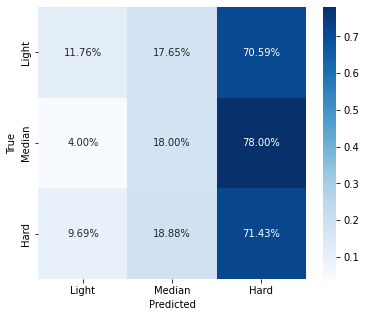

In [24]:
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

# PCA


          0
0  0.612341
1  0.279710
2  0.045769
3  0.038282
4  0.015992
5  0.003444
6  0.002742
7  0.000750
8  0.000069
9  0.000037
0.9991356669390045


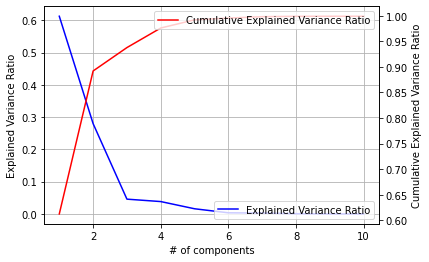

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(X_all,y)
variance = pca.explained_variance_ratio_
print(pd.DataFrame(variance))
print(sum(variance))

fig, ax1 = plt.subplots()
ax1.plot(np.arange(1, 11), variance, 'b-')
ax1.set_ylabel('Explained Variance Ratio')
ax1.grid('minor')
ax1.legend(['Explained Variance Ratio'], loc = 'lower right')
ax2 = ax1.twinx()
ax2.plot(np.arange(1, 11), np.cumsum(variance), 'r-')

ax1.set_xlabel('# of components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.legend(['Cumulative Explained Variance Ratio'], loc = 'upper right')


In [26]:
comp__X.shape

NameError: name 'comp__X' is not defined

In [ ]:
list(range(0,3))

[0, 1, 2]

FileNotFoundError: [Errno 2] No such file or directory: 'pca/0-1.png'

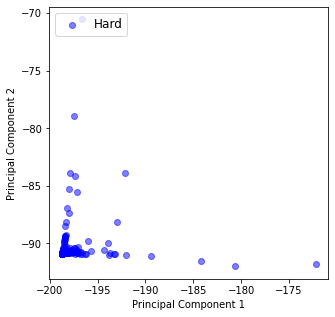

In [ ]:
comp__X = pca.transform(X)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'slategray', 'darkorange', 'lime']
for i in range(10):
    for j in range(i+1,10):
        fig, ax = plt.subplots(figsize=(5,5))
        for label, color in zip(np.array([3,2,1]), colors):
            class_embeddings = comp__X[y == label]
            plt.rcParams.update({'font.size': 12})
            plt.scatter(class_embeddings[:, i], class_embeddings[:,j], c=color, label=label, alpha=0.5)
            plt.legend(['Hard','Median','Light'],loc = "upper left")
            plt.xlabel("Principal Component " + str(i+1))
            plt.ylabel("Principal Component " + str(j+1))
            plt.savefig('pca/'+str(i) + '-' + str(j))
            plt.grid('minor')
        ax.grid('minor')
        ax.legend(title='Nursing Level')
        plt.close()
        

# Logistic  Regression

## All features

0.5588545907666495

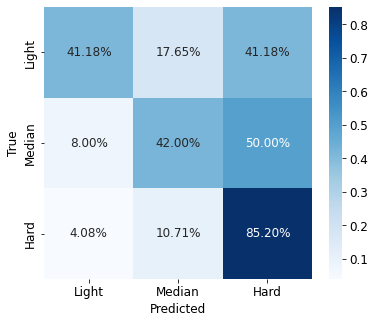

In [ ]:

clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros, y_ros)
y_pred = clf.predict(X_test)

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

1.0

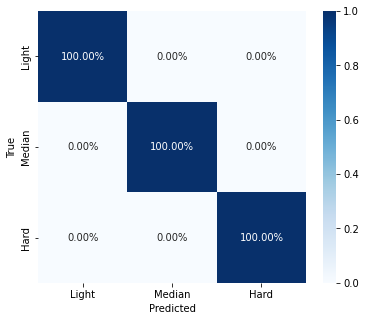

In [ ]:
# train confusion
clf = LogisticRegression(random_state=0,max_iter=1000,multi_class='multinomial').fit(X_ros, y_ros)
y_pred = clf.predict(X_test)

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_ros, clf.predict(X_ros))
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_ros, clf.predict(X_ros), average = 'macro')

## pca selection

0.9472827187544598


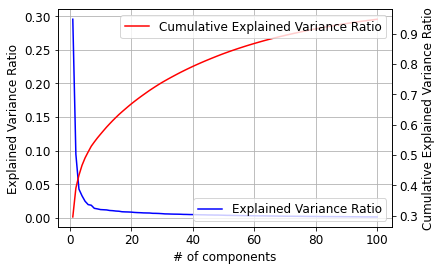

In [ ]:
n = 100
pca = PCA(n_components = n)
pca.fit(X_ros,y_ros)
variance = pca.explained_variance_ratio_
# print(pd.DataFrame(variance))
print(sum(variance))

fig, ax1 = plt.subplots()
ax1.plot(np.arange(1, n+1), variance, 'b-')
ax1.set_ylabel('Explained Variance Ratio')
ax1.grid('minor')
ax1.legend(['Explained Variance Ratio'], loc = 'lower right')
ax2 = ax1.twinx()
ax2.plot(np.arange(1, n+1), np.cumsum(variance), 'r-')

ax1.set_xlabel('# of components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.legend(['Cumulative Explained Variance Ratio'], loc = 'upper right')


In [ ]:
comp__X = pca.transform(X_ros)
comp__X.shape

(1173, 100)

In [ ]:

clf = LogisticRegression(random_state=0,max_iter=10000).fit(comp__X, y_ros)
y_pred = clf.predict(pca.transform(X_test))

score = cross_val_score(clf, pca.transform(X_test), y_test, cv=5, scoring='f1_macro')
print(f'Random Forest Test Score: {np.mean(score)}')

Random Forest Test Score: 0.4699897023054917


0.508230239637535

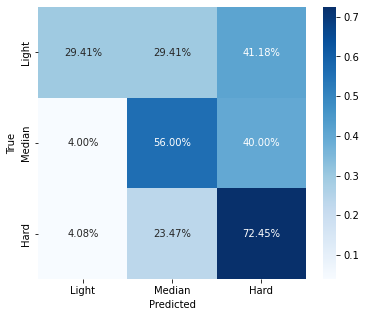

In [ ]:
# y_pred_all = rf.predict(X)
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

# Random forest

## All Features

In [ ]:
# colors = {1:'red', 2:'green', 3:'blue'}
# plt.scatter(X['S31_S31_var_min1'], X['S30_S31_var_min1'],c=y.map(colors))

In [ ]:
X_ros

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,...,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230,p1_freq,p2_freq,p3_freq,p1,p2,p3
0,0.296668,-0.201209,0.212850,-0.241140,-0.621569,0.036362,0.029800,-0.174265,0.006814,-0.663213,...,0.219326,-0.373628,2.255461,-0.565805,0.990793,-0.739481,-1.404514,-0.055506,0.034903,-0.478276
1,0.186833,-0.220891,0.275125,-0.135115,0.837112,-0.330420,0.242840,-0.183128,-1.191629,0.333842,...,-0.550302,-0.659712,0.144960,0.170893,-0.525860,0.977342,-1.052788,-0.047559,-0.293165,-0.069493
2,0.733391,-0.296806,0.445706,-0.227552,0.115822,-0.391069,0.398301,-0.276924,-1.471219,0.004582,...,-0.176979,-0.030168,-0.620449,-0.454086,0.727027,-0.773144,0.372632,-0.285480,-0.290956,-0.131753
3,-0.366263,-0.400839,0.285956,-0.167146,1.788635,0.723719,-0.315670,0.192088,1.312036,0.558759,...,-0.584319,-0.068133,-0.708259,1.373629,-0.723684,1.246648,-1.237907,0.225955,0.382228,0.809140
4,0.569947,-0.457073,0.594626,-0.320112,0.492567,-0.697203,0.674677,-0.354005,-0.890402,0.025450,...,-1.063598,0.012196,-0.290991,-0.740815,-0.921508,0.371405,0.465192,-0.634505,-0.656784,-0.824695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,-0.177975,-0.305242,0.145159,-0.259383,0.890243,0.599532,-0.476889,0.425584,-0.143799,-0.528727,...,0.270488,0.170991,0.689014,0.005864,-0.921508,0.640710,-1.200883,0.894874,0.826823,0.500174
1169,-0.519247,-0.223702,0.288663,-0.194595,-0.143392,-0.356413,0.306176,-0.227674,0.446571,0.122837,...,-0.920270,1.103645,-0.758982,-0.020783,1.386441,-1.076113,3.075376,-0.209507,-0.116870,-0.482800
1170,-0.188436,-0.119670,-0.084990,-0.196202,-0.553948,-0.148473,0.191019,-0.189606,-0.462447,0.053275,...,-0.561028,-0.184882,-0.025563,3.160444,0.529203,-1.143440,0.391144,-0.041182,-0.351209,0.216484
1171,0.403887,0.855988,-0.805221,1.129970,2.071999,4.951825,-4.933450,9.209345,-4.955837,1.745950,...,-0.132155,0.188185,-0.786654,0.795819,-0.328036,-2.422641,1.390789,5.663501,2.794103,5.522102


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=1)
rf.fit(X_ros, y_ros)
score = cross_val_score(rf, X_test, y_test, cv=5, scoring='f1_macro')
importance = rf.feature_importances_
importance_idx = np.argsort(importance)[::-1]
col_names = list(X.columns)
importance_sequence = [col_names[i] for i in importance_idx]

print(f'Random Forest Test Score: {np.mean(score)}')
print("Feature importance sequence: ",importance_sequence)

Random Forest Test Score: 0.4164522099275169
Feature importance sequence:  ['S34_S31_var_min2', 'S31_S31_var_min1', 'S31_max_50', 'S31_mean_10', 'S31_var_10', 'S30_S31_var_min1', 'S31_var_50', 'S31_mean_50', 'S31_t_var', 'S32_S32_var_max2', 'S32_S31_var_min1', 'S34_S31_var_min1', 'S31_S31_var_min2', 'S30_S31_var_min2', 'S32_max-f_110', 'S30_S32_var_max2', 'S34_S32_var_min1', 'S31_S31_var_max2', 'S34_var_30', 'S31_S30_var_min1', 'S32_mean_10', 'S32_S31_var_max1', 'S32_S32_var_min2', 'S30_kurtosis_70', 'S31_t_max', 'S30_max-f_230', 'S31_skewness_50', 'S31_var_70', 'S30_S32_var_min1', 'S31_mean_30', 'p1', 'S30_max-f_170', 'S31_max_30', 'S30_skewness_70', 'S34_S32_var_max2', 'S30_mean_10', 'S32_energy_mean', 'S32_var_30', 'S32_t_var', 'S31_mean_70', 'S31_S32_var_min2', 'S30_S30_var_max2', 'S32_S31_var_min2', 'S31_skewness_90', 'S31_max_90', 'S34_S30_var_min1', 'S32_S32_var_min1', 'S31_S32_var_max2', 'S31_t_min', 'S31_skewness_170', 'S34_kurtosis_110', 'S34_S32_var_min2', 'S30_S30_var_min2'

In [ ]:
importance_sequence

['S31_max_50',
 'S31_mean_10',
 'S34_S31_var_min2',
 'S31_mean_50',
 'S31_S31_var_min1',
 'S31_var_10',
 'S32_S32_var_max2',
 'S32_S31_var_min1',
 'S31_var_50',
 'S31_t_var',
 'S30_S31_var_min2',
 'S34_S31_var_min1',
 'S30_S31_var_min1',
 'S32_S31_var_max1',
 'S30_var_230',
 'S30_max_170',
 'S34_S32_var_max2',
 'S34_var_30',
 'S31_mean_30',
 'S30_S32_var_max2',
 'S31_S31_var_min2',
 'S31_S31_var_max2',
 'S31_var_70',
 'S34_S32_var_min1',
 'S31_t_max',
 'S32_var_50',
 'S30_skewness_70',
 'S30_max_190',
 'S31_energy_mean',
 'S32_max-f_110',
 'S30_kurtosis_10',
 'S30_mean_10',
 'S30_S32_var_min1',
 'S31_skewness_30',
 'S32_S31_var_min2',
 'S30_mean_190',
 'S32_mean_230',
 'S34_S31_var_max1',
 'p1',
 'S34_max-f_230',
 'S31_S32_var_max2',
 'S30_max-f_150',
 'S30_max-f_50',
 'p3',
 'S31_S30_var_min1',
 'S30_mean_30',
 'S31_max_210',
 'S30_mean_50',
 'S31_S30_var_max2',
 'S31_mean_90',
 'S31_mean_130',
 'S34_S32_var_min2',
 'S31_S32_var_min2',
 'S31_kurtosis_30',
 'S34_max_30',
 'S34_kurtosis

Text(0.5, 1.0, 'Feature Importance')

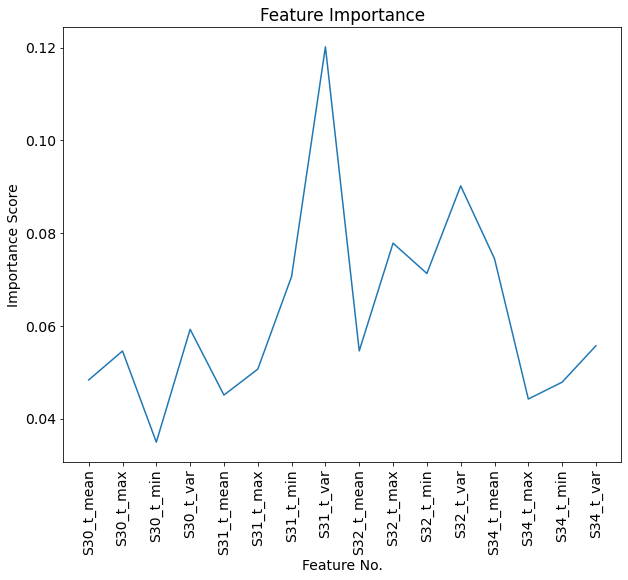

In [ ]:
# plot feature importance
feature_num = range(X_train.shape[1])
plt.rcParams.update({'font.size': 14})
plt.figure(figsize = (10,8))
plt.plot(feature_num,importance)
plt.ylabel('Importance Score')
plt.xticks(ticks = feature_num, labels = col_names, rotation='vertical')
plt.xlabel("Feature No.")
plt.title('Feature Importance')
# plt.savefig('Feature Importance',dpi=2000)

0.5821048661719521

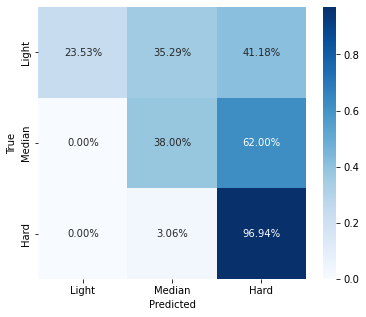

In [ ]:
y_pred = rf.predict(X_test)
y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

## use some features

### peaks features

In [ ]:
features = ['p1_freq', 'p2_freq', 'p3_freq', 'p1', 'p2', 'p3']
x_part = X_ros[features]
x_part

,p1_freq,p2_freq,p3_freq,p1,p2,p3
0,0.990793,-0.739481,-1.404514,-0.055506,0.034903,-0.478276
1,-0.525860,0.977342,-1.052788,-0.047559,-0.293165,-0.069493
2,0.727027,-0.773144,0.372632,-0.285480,-0.290956,-0.131753
3,-0.723684,1.246648,-1.237907,0.225955,0.382228,0.809140
4,-0.921508,0.371405,0.465192,-0.634505,-0.656784,-0.824695
...,...,...,...,...,...,...
1168,1.056734,-0.941460,0.483704,0.104465,0.142807,0.300605
1169,1.056734,-0.941460,0.483704,0.104465,0.142807,0.300605
1170,-0.657743,0.876353,-1.015764,-0.322261,-0.262796,-0.591012
1171,-0.459918,1.583280,-2.348624,1.219879,0.066350,-0.183099


0.5383710939266494

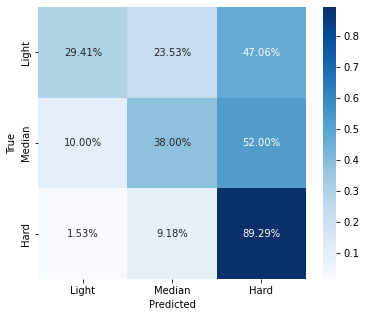

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.752851711026616


0.5230555555555555

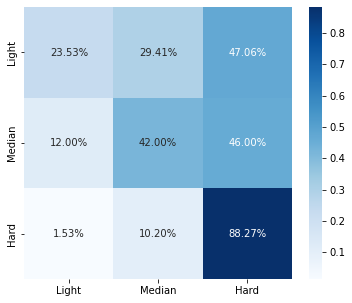

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(x_part, y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

0.4875358438814413

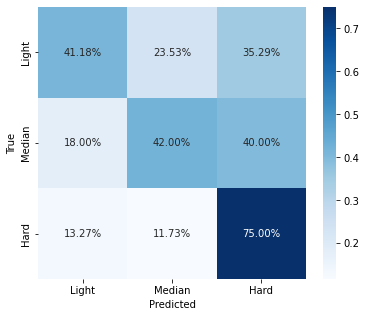

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

### normal features

In [ ]:
features = X_ros.columns[0:16].tolist()
x_part = X_ros[features]
x_part

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,S32_t_min,S32_t_var,S34_t_mean,S34_t_max,S34_t_min,S34_t_var
0,0.296668,-0.201209,0.212850,-0.241140,-0.621569,0.036362,0.029800,-0.174265,0.006814,-0.663213,0.647409,-0.345277,-0.070545,-0.501906,0.472572,-0.303878
1,0.186833,-0.220891,0.275125,-0.135115,0.837112,-0.330420,0.242840,-0.183128,-1.191629,0.333842,-0.375331,0.128750,-0.411234,-0.117015,0.331704,-0.137526
2,0.733391,-0.296806,0.445706,-0.227552,0.115822,-0.391069,0.398301,-0.276924,-1.471219,0.004582,-0.396394,-0.235741,0.082064,-0.127857,0.302357,-0.233013
3,-0.366263,-0.400839,0.285956,-0.167146,1.788635,0.723719,-0.315670,0.192088,1.312036,0.558759,-0.686599,-0.129790,0.181053,-0.360960,0.493115,-0.251412
4,0.569947,-0.457073,0.594626,-0.320112,0.492567,-0.697203,0.674677,-0.354005,-0.890402,0.025450,0.226143,-0.238719,-0.290797,-0.656404,0.622244,-0.365818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.632710,-0.204021,0.391554,-0.133832,0.916003,0.148996,-0.085357,-0.147910,-0.078889,-0.403515,0.560816,-0.328538,-0.597664,-0.249829,0.199641,-0.033888
1169,0.632710,-0.204021,0.391554,-0.133832,0.916003,0.148996,-0.085357,-0.147910,-0.078889,-0.403515,0.560816,-0.328538,-0.597664,-0.249829,0.199641,-0.033888
1170,-0.453869,-0.156222,0.372600,-0.148025,0.600438,-0.495039,0.478911,-0.285188,-0.263222,0.357029,0.137210,-0.093558,-0.383187,-0.396196,0.173228,-0.166143
1171,-0.001455,-0.780418,0.784161,-0.352477,-2.411914,-0.090712,-0.024900,0.191609,0.191428,0.271236,0.176996,-0.151385,0.057316,-0.789218,0.710287,-0.398570


0.553796076361397

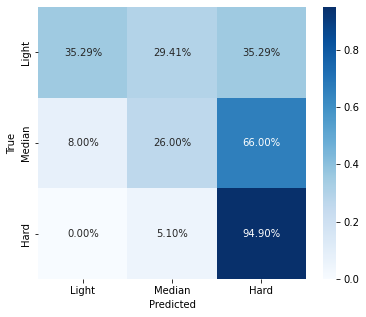

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.7300380228136882


0.4928783494885904

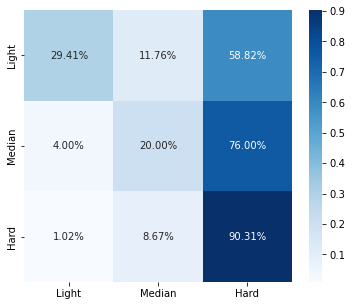

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(x_part, y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

0.4137442804109471

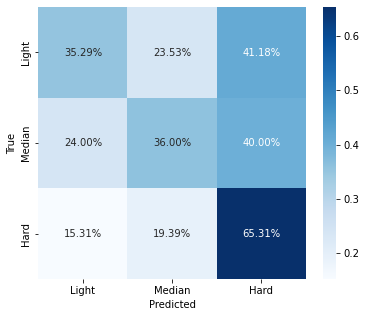

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

### energy_features

In [ ]:
features = X_ros.columns[16:32].tolist()
x_part = X_ros[features]
x_part

,S30_energy_mean,S30_energy_max,S30_energy_min,S30_energy_var,S31_energy_mean,S31_energy_max,S31_energy_min,S31_energy_var,S32_energy_mean,S32_energy_max,S32_energy_min,S32_energy_var,S34_energy_mean,S34_energy_max,S34_energy_min,S34_energy_var
0,-0.241143,-0.317561,0.999366,-0.151380,-0.174265,-0.207489,-0.061741,-0.135852,-0.345301,-0.501807,-0.999366,-0.186770,-0.303888,-0.371802,0.999366,-0.161219
1,-0.135121,-0.332815,0.999366,-0.150460,-0.183128,-0.298754,-0.061741,-0.137069,0.128759,-0.080864,-0.999366,-0.154307,-0.137543,-0.277372,0.999366,-0.159254
2,-0.227551,-0.353761,0.999366,-0.151713,-0.276926,-0.332789,-0.061741,-0.137882,-0.235651,-0.067334,-0.999366,-0.175842,-0.233029,-0.280838,0.999366,-0.159891
3,-0.167151,-0.339849,0.999366,-0.150545,0.192095,0.140022,-0.061741,-0.124198,-0.129731,0.139050,-0.999366,-0.151576,-0.251426,-0.344306,0.999366,-0.160660
4,-0.320112,-0.391451,0.999366,-0.152854,-0.354005,-0.378226,-0.061741,-0.138279,-0.238709,-0.270050,-0.999366,-0.180496,-0.365821,-0.392079,0.999366,-0.161519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,-0.133834,-0.327890,0.999366,-0.150899,-0.147909,-0.162880,-0.061741,-0.134856,-0.328563,-0.440428,-0.999366,-0.186500,-0.033905,-0.315696,0.999366,-0.157805
1169,-0.133834,-0.327890,0.999366,-0.150899,-0.147909,-0.162880,-0.061741,-0.134856,-0.328563,-0.440428,-0.999366,-0.186500,-0.033905,-0.315696,0.999366,-0.157805
1170,-0.148029,-0.313403,0.999366,-0.150046,-0.285188,-0.351061,-0.061741,-0.137985,-0.093604,-0.081554,-0.999366,-0.169817,-0.166158,-0.308955,0.999366,-0.159452
1171,-0.352480,-0.438783,0.999366,-0.153186,0.191625,-0.213562,-0.061741,-0.131032,-0.151426,-0.135075,-0.999366,-0.181170,-0.398573,-0.400536,0.999366,-0.161629


0.47781825698266284

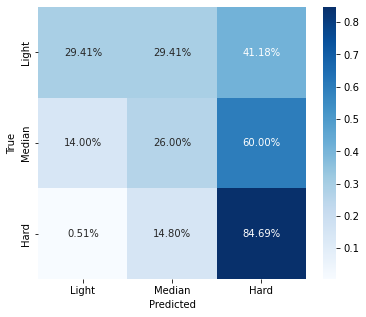

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.752851711026616


0.5014529844444349

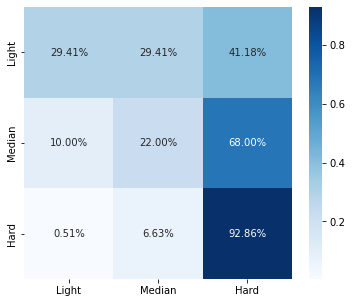

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(x_part, y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

0.43397736393351094

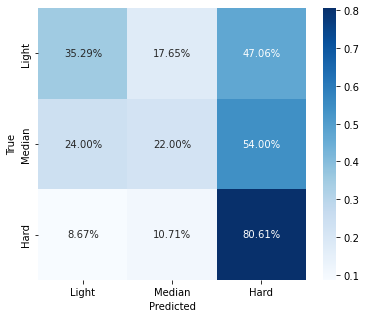

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

### var_features

In [ ]:
features = X_ros.columns[32:96].tolist()
x_part = X_ros[features]
x_part

,S30_S30_var_max1,S30_S30_var_max2,S30_S30_var_min1,S30_S30_var_min2,S30_S31_var_max1,S30_S31_var_max2,S30_S31_var_min1,S30_S31_var_min2,S30_S32_var_max1,S30_S32_var_max2,...,S34_S31_var_min1,S34_S31_var_min2,S34_S32_var_max1,S34_S32_var_max2,S34_S32_var_min1,S34_S32_var_min2,S34_S34_var_max1,S34_S34_var_max2,S34_S34_var_min1,S34_S34_var_min2
0,-0.250998,-0.176606,0.157830,-0.136633,-0.182713,-0.090216,-0.081936,-0.186816,-0.290369,-0.243089,...,-0.081723,-0.190993,-0.295185,-0.315818,-0.105437,-0.215601,-0.296935,-0.198225,-0.267988,-0.172538
1,-0.232830,-0.017401,0.774087,0.307652,-0.187735,-0.147875,-0.136086,0.078570,-0.003831,0.091918,...,-0.158730,0.049982,-0.088240,0.151793,1.068863,0.126421,-0.248406,-0.016180,1.185852,0.267883
2,-0.238916,-0.185932,0.164277,-0.163094,-0.193062,-0.213910,-0.341187,-0.178633,-0.245035,-0.207041,...,-0.148473,-0.312701,-0.259986,-0.253008,-0.122999,-0.275775,-0.242498,-0.152573,0.300882,-0.126723
3,-0.215186,0.062842,-0.343158,-0.103405,-0.151682,0.492220,1.597825,0.905779,-0.296361,0.594843,...,0.568409,0.827835,-0.293994,0.750120,-0.258490,-0.275057,-0.251938,-0.176807,0.110877,-0.153300
4,-0.285141,-0.299368,-0.530253,-0.376117,-0.247960,-0.260898,-0.489435,-0.331070,-0.078875,-0.199980,...,-0.379254,-0.326314,-0.214029,0.089314,-0.290805,-0.293593,-0.324657,-0.306974,-0.517894,-0.366575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,-0.192180,-0.024422,0.533665,0.491295,-0.172710,-0.121239,0.118629,0.020673,-0.268671,-0.256827,...,0.080432,0.056994,-0.256619,-0.301198,-0.118433,-0.268763,-0.159450,0.117414,1.053834,0.583783
1169,-0.192180,-0.024422,0.533665,0.491295,-0.172710,-0.121239,0.118629,0.020673,-0.268671,-0.256827,...,0.080432,0.056994,-0.256619,-0.301198,-0.118433,-0.268763,-0.159450,0.117414,1.053834,0.583783
1170,-0.187999,-0.150780,0.112585,0.187829,-0.208002,-0.233066,-0.357268,-0.144459,-0.178942,-0.152083,...,-0.274370,-0.257588,-0.190218,-0.251359,0.930805,-0.228423,-0.220394,-0.100500,0.210652,0.349651
1171,-0.307732,-0.361508,-0.369657,-0.412457,-0.001323,0.002059,0.821167,0.540884,-0.198614,-0.148801,...,0.692732,0.890774,-0.097113,-0.165007,-0.109146,-0.148099,-0.337435,-0.365227,-0.502117,-0.383678


0.5681057901708538

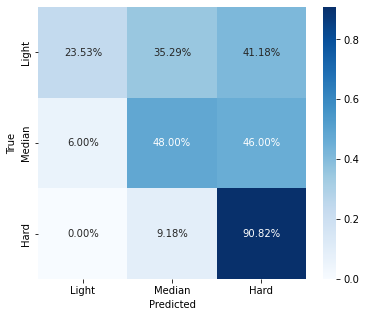

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.7756653992395437


0.5670917394900564

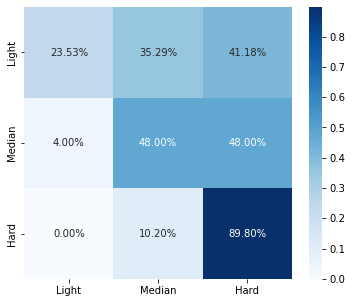

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(x_part, y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

0.4432163330572143

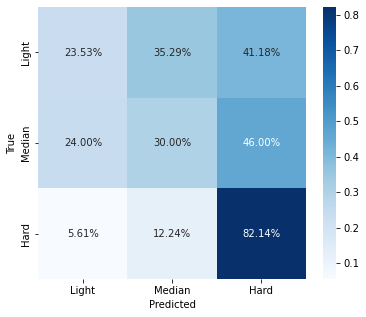

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

### freq features

In [ ]:
features = X_ros.columns[96:384].tolist()
x_part = X_ros[features]
x_part

,S30_mean_10,S30_mean_30,S30_mean_50,S30_mean_70,S30_mean_90,S30_mean_110,S30_mean_130,S30_mean_150,S30_mean_170,S30_mean_190,...,S34_kurtosis_50,S34_kurtosis_70,S34_kurtosis_90,S34_kurtosis_110,S34_kurtosis_130,S34_kurtosis_150,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230
0,-0.455757,-0.165785,0.185586,-0.209818,-0.336552,-0.345937,-0.198839,-0.334847,-0.435905,-0.342522,...,-1.033572,1.585373,-0.297556,-0.606062,-0.708344,2.046021,0.219326,-0.373628,2.255461,-0.565805
1,0.194872,0.084454,0.351996,-0.014761,0.056723,0.098594,-0.062517,-0.039594,-0.133300,0.081016,...,0.970761,-0.903575,-0.195432,0.435411,1.429814,-0.109440,-0.550302,-0.659712,0.144960,0.170893
2,0.053001,-0.108476,-0.186108,-0.246532,-0.264006,-0.106658,-0.016557,0.013294,-0.239348,-0.128663,...,8.114689,-0.733632,-0.864699,0.028318,0.058608,0.056822,-0.176979,-0.030168,-0.620449,-0.454086
3,-0.186992,0.323286,0.048212,-0.195498,-0.357415,-0.101374,-0.138910,-0.152090,-0.191782,-0.133901,...,0.008647,-0.291643,-0.642590,-0.394776,0.673986,-0.711097,-0.584319,-0.068133,-0.708259,1.373629
4,-0.121459,-0.420781,-0.646854,-0.559177,-0.471816,-0.531161,-0.429326,-0.243584,-0.408250,-0.238440,...,2.311470,1.731243,-0.482259,-0.642777,0.585216,-0.753350,-1.063598,0.012196,-0.290991,-0.740815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,-0.214881,0.675246,0.307576,-0.097381,0.004807,0.059861,-0.190680,-0.272511,-0.180681,-0.009462,...,-0.703356,4.084373,2.094442,-0.737281,-1.005950,2.461361,2.070222,-0.790358,-0.283547,-1.346902
1169,-0.214881,0.675246,0.307576,-0.097381,0.004807,0.059861,-0.190680,-0.272511,-0.180681,-0.009462,...,-0.703356,4.084373,2.094442,-0.737281,-1.005950,2.461361,2.070222,-0.790358,-0.283547,-1.346902
1170,-0.110668,0.153487,0.198705,-0.147672,0.246620,0.270027,-0.106463,0.185489,-0.015954,0.021373,...,-0.027314,-0.226760,0.366753,0.185289,-0.520821,1.569577,0.367290,2.544563,0.634884,1.187278
1171,-0.261847,-0.452120,-0.732988,-0.777340,-0.666021,-0.727204,-0.614002,-0.680513,-0.665842,-0.717873,...,-0.660688,-0.416921,3.371891,-0.807725,2.465937,-0.011781,1.117842,2.308461,-0.475555,-0.545215


0.5889940796482853

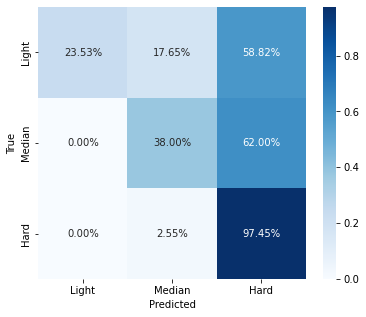

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.7680608365019012


0.537052129554167

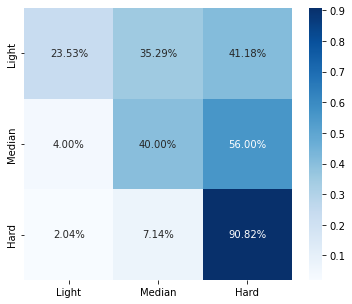

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(x_part, y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

0.5452674050527908

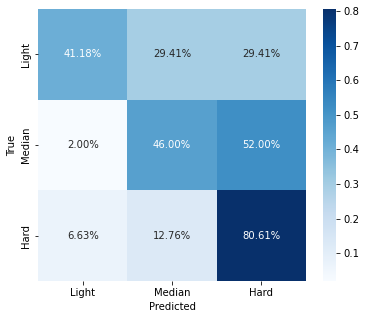

In [ ]:
# LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])

axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

### first 20 feature

In [ ]:
# features = ['S34_S31_var_min2', 'S31_max_50', 'S31_S31_var_min1', 'S31_mean_10', 'S31_mean_50', 'S32_S31_var_min1', 'S31_var_10', 'S30_S31_var_min1', 'S31_var_50', 'S31_t_var', 'S34_S31_var_min1', 'S34_var_30', 'S31_S31_var_min2', 'S30_max_170', 'S30_S32_var_max2', 'S30_S31_var_min2', 'S32_S31_var_min2', 'S31_var_70', 'S32_S31_var_max1', 'S32_S32_var_max2', 'S34_S34_var_max2', 'S32_mean_50', 'S30_kurtosis_70', 'S31_S30_var_min1', 'S31_max_90', 'S34_max_30', 'S32_S32_var_min2', 'S30_mean_230', 'S30_max_190', 'S31_S31_var_max2', 'S34_S30_var_min1', 'S30_mean_10', 'S32_energy_mean', 'S32_S34_var_min1', 'S30_var_50']
features = ['S31_max_50', 'S31_mean_10', 'S34_S31_var_min2', 'S31_mean_50', 'S31_S31_var_min1', 'S31_var_10', 'S32_S32_var_max2', 'S32_S31_var_min1', 'S31_var_50', 'S31_t_var', 'S30_S31_var_min2', 'S34_S31_var_min1', 'S30_S31_var_min1', 'S32_S31_var_max1', 'S30_var_230', 'S30_max_170', 'S34_S32_var_max2', 'S34_var_30', 'S31_mean_30', 'S30_S32_var_max2']
print(len(features))
x_part = X_ros[features]
x_part

20


,S31_max_50,S31_mean_10,S34_S31_var_min2,S31_mean_50,S31_S31_var_min1,S31_var_10,S32_S32_var_max2,S32_S31_var_min1,S31_var_50,S31_t_var,S30_S31_var_min2,S34_S31_var_min1,S30_S31_var_min1,S32_S31_var_max1,S30_var_230,S30_max_170,S34_S32_var_max2,S34_var_30,S31_mean_30,S30_S32_var_max2
0,0.894463,-0.026997,-0.190993,0.139803,0.104321,-0.175254,-0.280765,0.239762,0.049033,-0.174265,-0.186816,-0.081723,-0.081936,-0.205120,-0.188897,-0.451602,-0.315818,-0.254284,0.066925,-0.243089
1,-0.273142,-0.185453,0.049982,-0.300047,0.044259,-0.195278,0.286865,0.148624,-0.240892,-0.183128,0.078570,-0.158730,-0.136086,-0.218131,-0.053785,-0.133373,0.151793,-0.080883,0.082381,0.091918
2,-0.356397,-0.493885,-0.312701,-0.332712,-0.181193,-0.224363,-0.238428,-0.309264,-0.201139,-0.276924,-0.178633,-0.148473,-0.341187,-0.206464,-0.106812,-0.082498,-0.253008,-0.068226,-0.325470,-0.207041
3,1.720197,1.022653,0.827835,0.877095,1.234056,0.112871,-0.324425,0.672514,0.552277,0.192088,0.905779,0.568409,1.597825,0.112336,-0.144732,-0.177286,0.750120,-0.187998,0.867152,0.594843
4,-0.883445,-0.634894,-0.326314,-0.738594,-0.440250,-0.260491,-0.154038,-0.395438,-0.352191,-0.354005,-0.331070,-0.379254,-0.489435,-0.242440,-0.176482,-0.272828,0.089314,-0.362435,-0.715080,-0.199980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.176081,0.434453,-0.003329,-0.222511,0.226452,0.033646,10.870641,-0.042075,-0.154156,-0.142385,-0.053359,0.018855,-0.089633,-0.147722,0.161557,0.404666,1.826335,0.424731,0.156781,9.399039
1169,-0.141711,0.465735,0.051123,0.124226,0.070027,-0.051718,-0.328420,-0.026003,-0.188835,-0.157803,0.024797,0.514913,-0.179836,-0.159000,-0.109297,-0.026847,-0.323034,-0.165653,0.079679,-0.276922
1170,-0.895496,-0.609917,-0.388134,-0.742870,-0.447462,-0.254982,-0.343694,-0.406420,-0.345542,-0.349909,-0.216692,-0.387689,-0.491408,-0.246628,-0.218981,-0.690033,-0.343723,-0.407425,-0.633201,-0.284734
1171,-0.043229,-0.093758,-0.157416,-0.241648,-0.136646,-0.209103,-0.312337,-0.243083,-0.135113,-0.236835,-0.194666,-0.234236,-0.286712,-0.182533,-0.091910,-0.074070,-0.310965,-0.094528,-0.107655,-0.259900


In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

f1_score(y_test, y_pred, average = 'macro')

0.594480428611411

### develop_algorithm

In [33]:
features = ['S31_max_50', 'S31_mean_10', 'S34_S31_var_min2', 'S31_mean_50', 'S31_S31_var_min1', 'S31_var_10', 'S32_S32_var_max2', 'S32_S31_var_min1', 'S31_var_50', 'S31_t_var', 'S30_S31_var_min2', 'S34_S31_var_min1', 'S30_S31_var_min1', 'S32_S31_var_max1', 'S30_var_230', 'S30_max_170', 'S34_S32_var_max2', 'S34_var_30', 'S31_mean_30', 'S30_S32_var_max2', 'S31_S31_var_min2', 'S31_S31_var_max2', 'S31_var_70', 'S34_S32_var_min1', 'S31_t_max', 'S32_var_50', 'S30_skewness_70', 'S30_max_190', 'S31_energy_mean', 'S32_max-f_110']
print(len(features))
x_part = X_ros[features]


max_f1_score = 0
best_20_features_list = []

converted_set = set(importance_sequence)

i = 0
count = 0
while i < len(features):

  j = 0
  new_converted_set = converted_set.copy()

  while j < len(features):
    new_converted_set.remove(features[j])
    j += 1

  for cur_feature in new_converted_set:
      features[i] = cur_feature
      x_part = X_ros[features]
      
      rf = RandomForestClassifier(random_state=1)
      rf.fit(x_part, y_ros)
      y_pred = rf.predict(X_test[features])
      # y_pred_all = rf.predict(X)

      cur_score = f1_score(y_test, y_pred, average = 'macro')
      count += 1
      if count % 50 == 0:
        print("iteration number: ", count)
      if (cur_score > max_f1_score):
        max_f1_score = cur_score
        best_20_features_list = features.copy()
        print("max f1 score update to: ", max_f1_score)
        print("current iteration number: ", count)

  i = i + 1
print("ultimate max f1 score: ", max_f1_score)

30
max f1 score update to:  0.5532773836571304
current iteration number:  1
max f1 score update to:  0.5789954043722888
current iteration number:  2
max f1 score update to:  0.5918772606996335
current iteration number:  38
iteration number:  50
max f1 score update to:  0.6186915793028578
current iteration number:  67
iteration number:  100
iteration number:  150
iteration number:  200
iteration number:  250
iteration number:  300
iteration number:  350
iteration number:  400
iteration number:  450
iteration number:  500
iteration number:  550
iteration number:  600
iteration number:  650
iteration number:  700
iteration number:  750
iteration number:  800
iteration number:  850
iteration number:  900
iteration number:  950
iteration number:  1000
iteration number:  1050
iteration number:  1100
iteration number:  1150
iteration number:  1200
iteration number:  1250
iteration number:  1300
iteration number:  1350
iteration number:  1400
iteration number:  1450
iteration number:  1500
ite

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_part, y_ros)
y_pred = rf.predict(X_test[features])
# y_pred_all = rf.predict(X)

f1_score(y_test, y_pred, average = 'macro')

## Decision Boundary (2 features)

0.4628114024340439

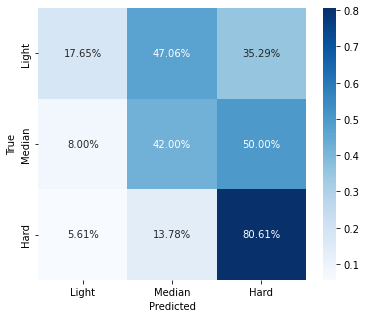

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_ros[['S31_max_50','S31_S31_var_min1']], y_ros)
y_pred = rf.predict(X_test[['S31_max_50','S31_S31_var_min1']])
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

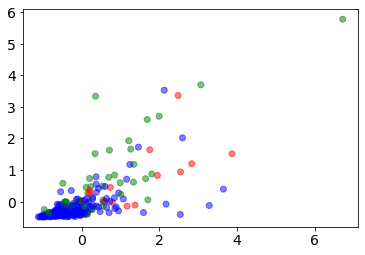

In [ ]:
colors = {1:'r', 2:'g', 3:'b'}
plt.scatter(X_test['S31_max_50'], X_test['S31_S31_var_min1'], c=y_test.map(colors), alpha=.5)
plt.scatter(X_test['S31_max_50'], X_test['S31_S31_var_min1'], c=y_test.map(colors), alpha=.5)


In [ ]:
plt.scatter(np.linspace(-2,8,50), X_test['S31_S31_var_min1'], c=y_test.map(colors), alpha=.5)

In [ ]:
x_test0.loc[:,:]

,S30_t_mean,S30_t_max,S30_t_min,S30_t_var,S31_t_mean,S31_t_max,S31_t_min,S31_t_var,S32_t_mean,S32_t_max,...,S34_kurtosis_50,S34_kurtosis_70,S34_kurtosis_90,S34_kurtosis_110,S34_kurtosis_130,S34_kurtosis_150,S34_kurtosis_170,S34_kurtosis_190,S34_kurtosis_210,S34_kurtosis_230
368,1.791204,-0.105611,-0.068744,-0.024125,-0.811551,0.151884,-0.312791,0.090224,-0.570630,2.654893,...,3.088135,1.506234,0.334622,-0.171666,-0.092636,0.783238,-0.555267,-0.869485,1.928126,-0.458066
237,-0.431641,-0.237761,0.440291,-0.313077,-0.024250,0.076795,-0.027778,-0.102276,-0.324198,-0.767556,...,-0.611140,0.397605,-0.346735,-0.594916,-0.082093,0.684328,1.295267,0.077208,-0.922257,-0.017017
39,-2.638796,1.752918,-1.844954,0.736718,0.940153,2.491206,-2.998819,1.309519,-0.701012,3.670498,...,-1.104243,0.180354,-1.023655,-1.192944,1.607824,0.127949,0.573802,-0.258260,-0.233500,-0.263322
653,-0.616006,-0.622963,0.372600,-0.322749,0.062691,-0.625001,0.605583,-0.329792,-0.672069,-0.505540,...,-0.450623,0.080049,-0.566740,0.257157,-0.601633,-0.180144,-0.294586,0.290827,0.621363,-0.270498
728,-0.436871,-0.634210,0.459245,-0.318423,-0.132122,-0.350636,0.363754,-0.256270,0.076501,-0.883493,...,-0.784172,-1.173435,0.995256,0.333935,0.125216,-0.525784,2.446831,1.734895,-0.391133,-0.445878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.032541,-0.412086,0.283248,-0.310253,-0.201353,-0.477711,0.429969,-0.288096,-0.041798,-0.556552,...,1.168374,-0.635528,0.612163,4.977953,0.263113,-0.818775,-0.249358,-0.142096,-1.271405,3.612372
132,0.134531,0.945962,-1.059739,0.525277,0.420116,-0.108040,0.018284,-0.146671,1.185026,0.271236,...,-0.185367,-0.016586,-0.885122,-0.651000,0.437880,-0.230761,-0.034650,-0.870993,-0.844590,0.382039
461,-0.192358,-0.361475,0.023315,-0.221652,-0.381675,-0.564352,0.548005,-0.324493,-0.485489,-0.373372,...,-0.679594,0.832052,-0.305889,-0.531262,-1.037552,0.977188,-0.521350,1.032117,-0.913152,-0.869389
198,0.126685,-0.743866,0.770623,-0.380324,-0.705290,0.073907,0.110409,-0.239014,0.019459,-0.832481,...,-0.271635,0.788905,2.120569,0.991528,0.192051,-1.203639,0.607995,1.197944,0.814984,-0.453305


In [ ]:
pd.DataFrame(np.array([[1,2]]), columns=['S31_max_50', 'S31_S31_var_min1'])

,S31_max_50,S31_S31_var_min1
0,1,2


In [ ]:
x_grid = []
x_test0 = X_test
for xi in np.linspace(-2,8,50):
    print(xi)
    for yi in np.linspace(-2,7,50):
        x_testi = pd.DataFrame(np.array([[xi,yi]]), columns=['S31_max_50', 'S31_S31_var_min1'])
        yi_pred = rf.predict(x_testi)
        x_grid.append(yi_pred[0])


-2.0
-1.7959183673469388
-1.5918367346938775
-1.3877551020408163
-1.183673469387755
-0.9795918367346939
-0.7755102040816326
-0.5714285714285714
-0.36734693877551017
-0.16326530612244894
0.04081632653061229
0.24489795918367374
0.44897959183673475
0.6530612244897958
0.8571428571428572
1.0612244897959187
1.2653061224489797
1.4693877551020407
1.6734693877551021
1.8775510204081636
2.0816326530612246
2.2857142857142856
2.4897959183673475
2.6938775510204085
2.8979591836734695
3.1020408163265305
3.3061224489795915
3.5102040816326534
3.7142857142857144
3.9183673469387754
4.122448979591837
4.326530612244898
4.530612244897959
4.73469387755102
4.938775510204081
5.142857142857143
5.346938775510204
5.551020408163265
5.755102040816327
5.959183673469388
6.163265306122449
6.36734693877551
6.571428571428571
6.775510204081632
6.979591836734695
7.183673469387756
7.387755102040817
7.591836734693878
7.795918367346939
8.0


In [ ]:
xi_list = []
yi_list = []
for xi in np.linspace(-2,8,50):
    
    for yi in np.linspace(-2,7,50):
        xi_list.append(xi)
        yi_list.append(yi)

In [ ]:
colors = []
for i in range(len(x_grid)):
    if x_grid[i] == 1:
        colors.append('r')
    if x_grid[i] == 2:
        colors.append('g')
    if x_grid[i] == 3:
        colors.append('b')

Text(0.5, 1.0, 'Decision Boundary')

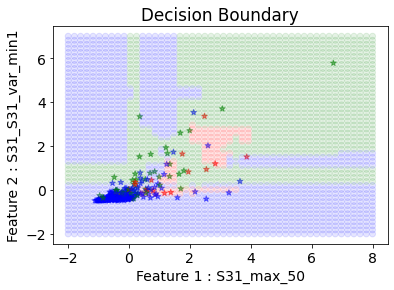

In [ ]:
# colors = {1:'r', 2:'g', 3:'b'}
plt.close()
plt.scatter(X_test['S31_max_50'], X_test['S31_S31_var_min1'], 
            marker='*',
            c=y_test.map({1:'r', 2:'g', 3:'b'}), alpha=.5)
# plt.scatter(X_test['S31_max_50'], X_test['S31_S31_var_min1'], c=y_test.map(colors), alpha=.01)

plt.scatter(xi_list, yi_list, c=colors, alpha=.1)
plt.xlabel('Feature 1 : S31_max_50')
plt.ylabel('Feature 2 : S31_S31_var_min1')
plt.title('Decision Boundary')

## GradientBoostingClassifier

Gradient Boosting Test Score: 0.7984790874524715


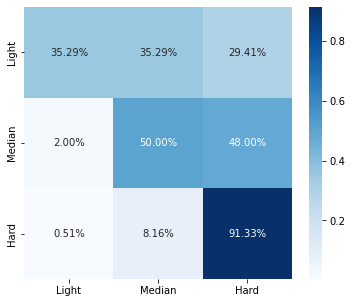

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(X_ros, y_ros)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test, y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')

In [ ]:
f1_score(y_test, y_pred, average = 'macro')

0.6272008437957197

## random forest selection

In [ ]:
rf = RandomForestClassifier()
features = importance_sequence[:70]
rf.fit(X_ros[features], y_ros)
score = cross_val_score(rf, X_test, y_test, cv=5, scoring='f1_macro')
print(f'Random Forest Test Score: {np.mean(score)}')

Random Forest Test Score: 0.4149424649424649


0.6101688270467066

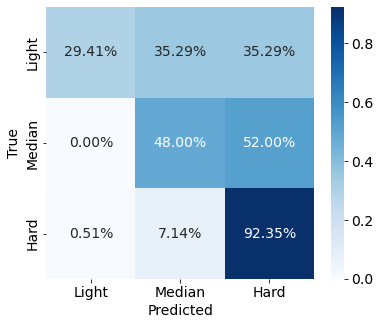

In [ ]:
y_pred = rf.predict(X_test[features])
y_pred_all = rf.predict(X[features])

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

Gradient Boosting Test Score: 0.7718631178707225


0.5356725172023707

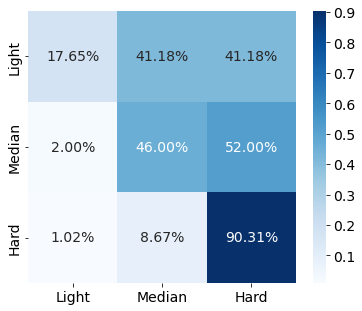

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=0).fit(X_ros[features], y_ros)
y_pred = clf.predict(X_test[features])
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
gbt_score = clf.score(X_test[features], y_test)
print(f'Gradient Boosting Test Score: {gbt_score}')
f1_score(y_test, y_pred, average = 'macro')

## PCA selection


0.7289214634089296


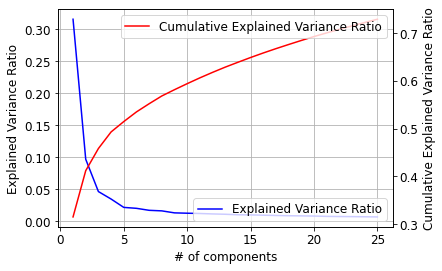

In [ ]:
n = 25
pca = PCA(n_components = n)
pca.fit(X_ros,y_ros)
variance = pca.explained_variance_ratio_
# print(pd.DataFrame(variance))
print(sum(variance))

fig, ax1 = plt.subplots()
ax1.plot(np.arange(1, n+1), variance, 'b-')
ax1.set_ylabel('Explained Variance Ratio')
ax1.grid('minor')
ax1.legend(['Explained Variance Ratio'], loc = 'lower right')
ax2 = ax1.twinx()
ax2.plot(np.arange(1, n+1), np.cumsum(variance), 'r-')

ax1.set_xlabel('# of components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.legend(['Cumulative Explained Variance Ratio'], loc = 'upper right')


In [ ]:
comp__X = pca.transform(X_ros)
comp__X.shape

(1173, 25)

In [ ]:
rf = RandomForestClassifier()
rf.fit(comp__X, y_ros)
score = cross_val_score(rf, pca.transform(X_test), y_test, cv=5, scoring='f1_macro')
print(f'Random Forest Test Score: {np.mean(score)}')

Random Forest Test Score: 0.37069225468244554


0.5240948590678054

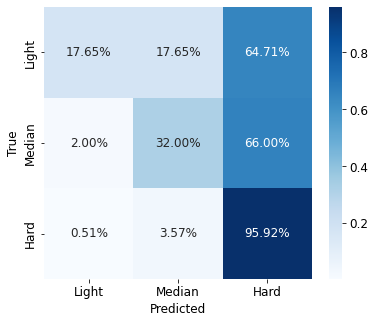

In [ ]:
y_pred = rf.predict(pca.transform(X_test))
# y_pred_all = rf.predict(X)

axis_labels = ["1","2","3"]
axis_labels = ["Light","Median","Hard"]
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
f1_score(y_test, y_pred, average = 'macro')

## smooth

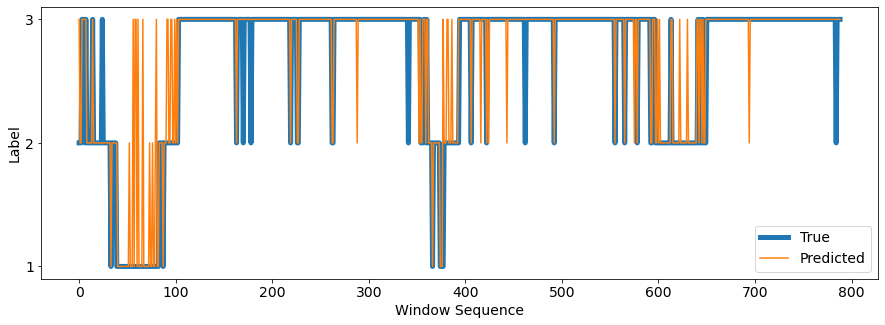

In [ ]:
# try to show and smooth the data
n_windows = range(y.shape[0])
plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 14})
plt.plot(n_windows,y,label = "True", linewidth=5)
plt.plot(n_windows,y_pred_all, label = "Predicted", linewidth=1.5)
plt.xlabel('Window Sequence')
plt.ylabel('Label')
plt.yticks(ticks = [1,2,3], labels = ['1','2','3'])
plt.legend()
plt.show()

In [ ]:
y_test

368    2
237    3
39     1
653    3
728    3
      ..
689    3
132    3
461    3
198    3
114    3
Name: nursing_label, Length: 263, dtype: int64

In [ ]:
piglet_nursing_pred

,pred
0,3
1,2
2,2
3,3
4,3
...,...
784,3
785,3
786,3
787,3


In [ ]:
piglet_nursing_pred

,pred
0,3
1,2
2,2
3,3
4,3
...,...
784,3
785,3
786,3
787,3


In [ ]:
piglet_nursing_rolling_pred[3]

2.0

In [ ]:
piglet_nursing_pred = pd.DataFrame({"pred": y_pred_all})
piglet_nursing_pred
piglet_nursing_rolling_pred = piglet_nursing_pred.pred.rolling(window =5, min_periods=1).mean().round().to_numpy()
piglet_nursing_rolling_pred

array([3., 2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

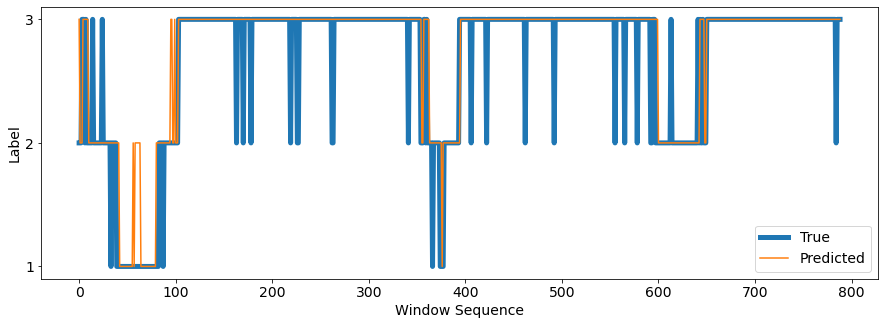

In [ ]:
# label smoothing
piglet_nursing_pred = pd.DataFrame({"pred": y_pred_all})
piglet_nursing_rolling_pred = piglet_nursing_pred.pred.rolling(window =5, min_periods=1).mean().round().to_numpy()

n_windows = range(y.shape[0])
plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 14})
plt.plot(n_windows,y,label = "True", linewidth=5)
plt.plot(n_windows,piglet_nursing_rolling_pred, label = "Predicted", linewidth=1.5)
plt.xlabel('Window Sequence')
plt.ylabel('Label')
plt.yticks(ticks = [1,2,3], labels = ['1','2','3'])
plt.legend()
plt.show()

In [ ]:
piglet_nursing_rolling_pred.shape

(789,)

In [ ]:
piglet_nursing_rolling_pred

array([3., 2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 2., 3., 3., 3., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

0.7808880269470245

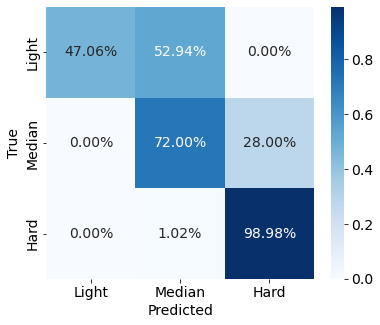

In [ ]:
cf_matrix = confusion_matrix(y_test,piglet_nursing_rolling_pred[idx_test] )
plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1, keepdims=True), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")

f1_score(y_test, piglet_nursing_rolling_pred[idx_test], average = 'macro')

# Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

Text(0, 0.5, 'y_pred')

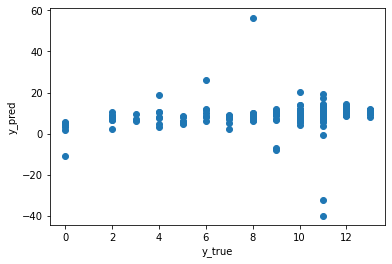

In [ ]:
y_pred = reg.predict(X_test)
y_true = y_test
plt.scatter(y_true, y_pred)
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [ ]:
score = reg.score(X_train, y_train)
print("score: ",score)

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  529845648402074.2
mae:  2.6325417014628862
mse:  37.94978964671562
rmse:  6.160340059340525
r2:  -3.237843258970848


In [ ]:
y_true_n0 = y_true[y_true != 0]
idx = y_true_n0.index
y_pred_n0 = reg.predict(X_test.loc[idx])

y_true = y_true_n0
y_pred = y_pred_n0

mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  0.38820930778515905
mae:  2.5740662710578985
mse:  38.02984731769373
rmse:  6.166834464917453
r2:  -4.439587386623775


# SVM


In [ ]:
regr = svm.SVR().fit(X_train, y_train)

Text(0, 0.5, 'y_pred')

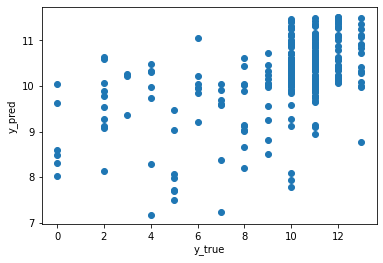

In [ ]:
y_pred = regr.predict(X_test)
y_true = y_test
plt.scatter(y_true, y_pred)
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [ ]:
score = regr.score(X_train, y_train)
print("score: ",score)

score:  0.29843138289699733


In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  916208719729922.4
mae:  1.7179842419111941
mse:  7.44262470067518
rmse:  2.7281174279482876
r2:  0.16888401199515124


In [ ]:
y_true_n0 = y_true[y_true != 0]
idx = y_true_n0.index
y_pred_n0 = regr.predict(X_test.loc[idx])

y_true = y_true_n0
y_pred = y_pred_n0

mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  0.3292028589237794
mae:  1.5501813925618924
mse:  5.76255713746402
rmse:  2.400532677857983
r2:  0.17575443157080162


# GradientBoostingRegressor

In [ ]:
 est = GradientBoostingRegressor(
...     n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
...     loss='squared_error'
... ).fit(X_train, y_train)

In [ ]:
y_test.shape

(261,)

In [ ]:
X_test.shape

(261, 112)

Text(0, 0.5, 'y_pred')

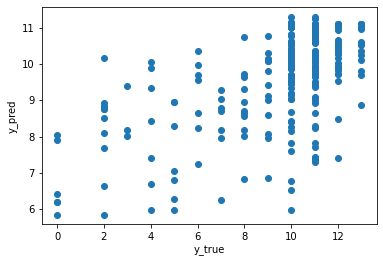

In [ ]:
y_pred = est.predict(X_test)
y_true = y_test
plt.scatter(y_true, y_pred)
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  700913436812727.1
mae:  1.7251901171379
mse:  5.993346220646302
rmse:  2.4481311690034713
r2:  0.3307245674801127


In [ ]:
y_true_n0 = y_true[y_true != 0]
idx = y_true_n0.index
y_pred_n0 = regr.predict(X_test.loc[idx])

y_true = y_true_n0
y_pred = y_pred_n0

mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  0.3292028589237794
mae:  1.5501813925618924
mse:  5.76255713746402
rmse:  2.400532677857983
r2:  0.17575443157080162


# MLPRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)

Text(0, 0.5, 'y_pred')

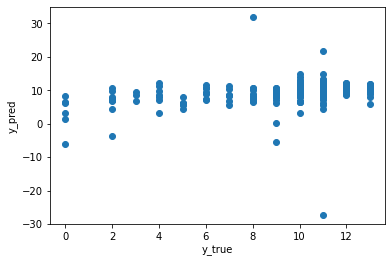

In [ ]:
y_pred = regr.predict(X_test)
y_true = y_test
plt.scatter(y_true, y_pred)
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  542374367111234.3
mae:  2.195575948723344
mse:  15.987709128651394
rmse:  3.9984633459182035
r2:  -0.7853433704896897


In [ ]:
y_true_n0 = y_true[y_true != 0]
idx = y_true_n0.index
y_pred_n0 = regr.predict(X_test.loc[idx])

y_true = y_true_n0
y_pred = y_pred_n0

mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("mape: ",mape)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))
print("r2: ",r2)

mape:  0.3414101171568723
mae:  2.1239715795191763
mse:  15.595072349243383
rmse:  3.9490596791189905
r2:  -1.2306363245629242
